In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as st

# Статистические гипотезы.

## 1. Введение и постановка задачи.

Статистическая гипотеза - это некоторое высказывание о форме распределения, параметрах распределения и.т.п. 
Например, кто-то высказывается о том что для выборки $X_{n}=[x_{1},..,x_{n}]$~$N(\theta, 4)$ математическое ожидание равно единице - таким образом была высказана статистическая гипотеза.

В математической статистике принято рассматривать одновременно две гипотезы, которые в некотором смысле "противоречат" друг другу: так называемые гипотеза $H_{0}$ и альтернатива $H_{1}$.
Например, кто-то выдвигает гипотезу о том что математическое ожидание выборки $X_{n}=[x_{1},..,x_{n}]$ равно единице ($\theta=1$) против альтернативы что математическое ожидание выборки равно пяти ($\theta=5$).

**Задача**: определить какое из суждений (гипотеза или альтернатива) в большей степени вероятно по выборке.

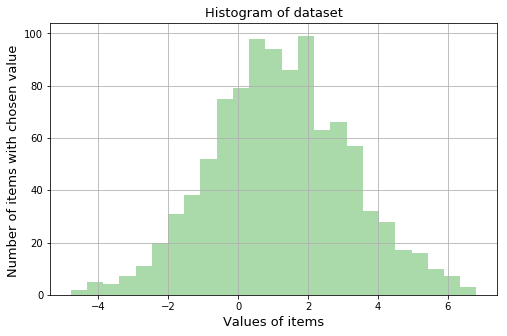

In [235]:
np.random.seed(0)
mu = 1.3 ; mu_h0 = 1.; mu_h1 = 4.
sigma = 2.

x = np.random.normal(mu, sigma, 1000)
x_ = np.linspace(-5., 10., 1000)

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(x, 25, color='C2', alpha = 0.4)
ax.grid('on')
ax.set_title('Histogram of dataset', fontsize=13)
ax.set_ylabel('Number of items with chosen value ', fontsize=13)
ax.set_xlabel('Values of items', fontsize=13)
plt.show()

## 2. Решение задачи в общем виде.

Для того, чтобы судить о справедливости гипотезы перед альтернативой, или наоборот, необходимо сначала выбрать некоторую статистику, по которой будет происходить принятие решение в пользу $H_{0}$ или $H_{1}$ соответственно.

**Опр.** Статистикой критерия $Z(\cdot)$ - называется статистика, по значениям которой судят о справедливости выдвинутой гипотезы.

Например, для принятия или отвержения гипотезы о равенстве математического ожидания единице логично выбрать в качестве статистики выборочное среднее:

\begin{equation*}
    Z(X) = \overline{X}=\frac{1}{n}\sum_{i}^{n}x_{i}.
\end{equation*}

После того, как была выбрана соответствующая статистика, мы можем оценить значение математического ожидания $\theta$. 
Но как определить соответствует ли полученное значение гипотезе или альтернативе? 
Если полученное значение принадлежит некоторому множеству, на котором верна гипотеза - то мы примем гипотезу как истинную, в противном же случае примем альтернативу.

**Опр.** Уровнем значимости $\alpha$ называется вероятность такая, что если событие, происходящее с такой вероятности считается практически невозможным. Обычно выбирают $\alpha = [0.1, 0.05, 0.01]$.

**Опр.** Критическим множеством $V_{k}$ называется подмножество области значений статистики критерия, вероятность попадания в которое при ИСТИННОСТИ гипотезы равно уровню значимости $\alpha$. 

\begin{equation*}
    V_{k} : P \Big(z = Z(X_{n}) \subset V{k} \quad| \quad H_{0} \Big) = \alpha
\end{equation*}

Например, критическим множеством (в одностороннем случае) при оценке математического ожидания будет интервал $[t_{\alpha}, +\infty]$ где $t_{\alpha}$ - квантиль порядка альфа для формы распределения, соответствующей гипотезе $H_{0}$ (см. рис. ниже).


Обычно для задания критического множества на всей области определения статистики критерия вводят критическую функцию, которая указывает на принадлежность элемента области определения к критическому множеству $V_{k}$.

**Опр.** Критической функцией называется индикаторная функция критического множества.

\begin{equation*}
    \phi(x_{i}) = \begin{cases} 1, & x_{i} \subset V{k}  \\ 0, & x_{i} \notin V{k} \end{cases}
\end{equation*}

Таким образом, после определения критического множества для гипотезы мы находим значение статистики $z=Z(X_{n})$ и принимаем статистическое решение: если $z \subset V{k}$ то принимаем альтернативу $H_{1}$, в противном случае принимаем гипотезу $H_{0}$.

Например, на рисунке ниже видно, что значение статистики $z$ находится в области принятия гипотезы.

**Алгоритм принятия решения относительно гипотезы**:
1. Формулируем гипотезу $H_{0}$ и альтернативу $H_{1}$.
2. Задаем уровень значимости $\alpha$.
3. Выбираем статистику критерия $Z(\cdot)$.
4. Вычисляем значение статистики на данной выборке $z = Z(X_{n})$.
5. Определяем критическую область $V_{k}$.
6. Принимаем статистическое решение:
    - При $z \subset V{k}$ принимаем $H_{1}$.
    - При $z \notin V{k}$ принимаем $H_{0}$.

z = 1.20948658502


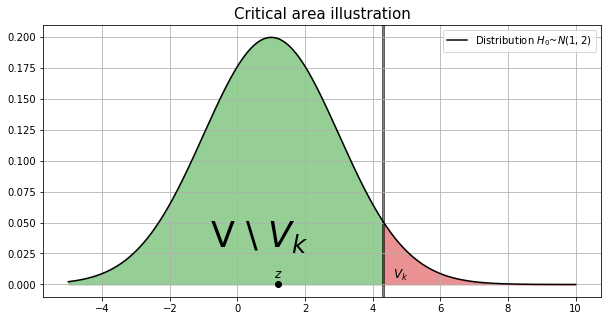

In [236]:
alpha = 0.05

def normal_distribution(x, mu, sigma):
    return np.exp(-(x-mu)**2 / (2. * sigma**2)) / np.sqrt(2. * np.pi * sigma**2)

def Z(x):
    return np.mean(x)

z = Z(x); z_crit = sigma * st.norm.ppf(1.-alpha) + mu_h0
print('z = {0}'.format(z))
Vk = x_[x_ > z_crit]; not_Vk = x_[x_ <= z_crit]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_, normal_distribution(x_, mu_h0, sigma), 'k', label = r'Distribution $H_{0}$~$N(1, 2)$')
ax.fill_between(Vk, normal_distribution(Vk, mu_h0, sigma), color = 'C3', alpha = 0.5)
ax.fill_between(not_Vk, normal_distribution(not_Vk, mu_h0, sigma), color = 'C2', alpha = 0.5)
ax.axvspan(z_crit, 1.01 * z_crit, alpha=0.5, color='k')
ax.plot(z, 0., 'ko')

ax.text(0.9*z, 0.005, r'$z$', fontsize=12)
ax.text(4.6, 0.005, r'$V_{k}$', fontsize=12)
ax.text(-0.8, 0.03, r"V \ $V_{k}$", fontsize=35)
ax.set_title('Critical area illustration', fontsize=15)
ax.grid('on')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

## 3. Решение задачи нахождением p-value.

Идея решения задачи принятия статистических гипотез методом p-value очень похожа на рассмотренный ранее алгоритм общего решения задачи.

Основное отличие в том что вместо построения критического множества $V_{k}$ мы определяем вероятность $p$ возникновения этого события или еще более экстремального (математическое ожидание равно единице на ИМЕЮЩИХСЯ ДАННЫХ) принимая ГИПОТЕЗУ ВЕРНОЙ (то есть принимаем плотность распределения ~$N(1, 4.)$) и сравниваем ее с уровнем значимости $\alpha$. 
Если эта вероятность больше уровня значимости, то мы принимаем гипотезу $H_{0}$, в противном случае принимаем альтернативу $H_{1}$.

**Алгоритм принятия решения относительно гипотезы**:
1. Формулируем гипотезу $H_{0}$ и альтернативу $H_{1}$.
2. Задаем уровень значимости $\alpha$.
3. Выбираем статистику критерия $Z(\cdot)$.
4. Вычисляем значение статистики на данной выборке $z = Z(X_{n})$.
5. Вычисляем веротяность $p$ возникновения значения $z$ при ВЕРНОЙ ГИПОТЕЗЕ $H_{0}$.
6. Принимаес статистическое решение:
    - При $p < \alpha$ принимаем $H_{1}$.
    - При $p > \alpha$ принимаем $H_{0}$.

**Пример** можно посмотреть [тут](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/hypothesis-testing-and-p-values) а мы проведем решение задачи на p-value с курса [stepic](https://stepik.org/lesson/26214/step/7?unit=8138):

*Проверяется гипотеза о равенстве мат. ожидания нормально распределенной генеральной совокупности 0 при альтернативе "мат. ожидание больше 0". 
Дисперсия известна и равна 4. 
В качестве статистики критерия было выбрано выборочное среднее. Найдите p-значение (p-value), если значение выборочного среднего, посчитанного по выборке объемом 25, составило 0.85.*

Решение: 

Найдем распределение выборочных средних при условии что гипотеза $H_{0}$ верна: поскольку статистика $Z = \overline(X)=\frac{1}{n}\sum_{i}^{n}x_{i}$, то:

\begin{equation*}
    E(\overline X) = E(\frac{1}{n}\sum_{i}^{n} x_{i}) = \frac{1}{n} \sum_{i}^{n}E(x_{i}) = \frac{n \mu}{n} = \mu, \\
    D(\overline X) = D(\frac{1}{n}\sum_{i}^{n} x_{i}) = \frac{1}{n^{2}} \sum_{i}^{n}E(x_{i}) = \frac{n D}{n^{2}} = \frac{1}{n}D, 
\end{equation*}

Таким образом, выборочное среднее имеет распределение $\overline X$~$N(0, 4/25)$ и вероятность более экстремального события чем математическое ожидание равное 0.85 равна 0.017 (можно вбить данные [тут](https://homepage.stat.uiowa.edu/~mbognar/applets/normal.html)).

**P.S.** Получить вероятность можно и другим путем - путем перехода от распределения ~$N(\mu, \sigma)$ к ~$N(0, 1)$ путем приведения к $x^{*}=\frac{x-\mu}{D}$.
В нашем случае, $x^{*}=\frac{0.85-0}{0.04}=2.125$ и соответствующая вероятность 0.017 (1. - st.norm.cdf(2.125)).

## 4. Примеры различного вида гипотез.

Если нам не известны параметры распределений, то для проверки гипотез необходимо составить статистики, которые имеют стандартные распределения, такие как: нормальное, Стьюдента, хи квадрат и.т.д.
После этого, по данным распределениям легко можно построить критическую область, или определить соответствующее p-value.

Хорошо написано в Фадеева, Лебедев стр 318.


### 4.1. Гипотезы о неизвестном среднем при известной дисперсии.

** Постановка задачи**:

Рассмотрим выборку $X_{n} = [x_{1},..., x_{n}]$ из нормального распределения с неизвестным математическим ожиданием ~$N(\theta, \sigma^{2})$.

Построим критические множества и соответствующие p-value для задач с гипотезой $H_{0}$: $\theta = \theta_{0}$ и альтернативами:
- Альтернатива 1 $H_{1}^{1}$: $\theta > \theta_{0}$
- Альтернатива 2 $H_{1}^{2}$: $\theta < \theta_{0}$
- Альтернатива 3 $H_{1}^{3}$: $\theta \neq \theta_{0}$

** Решение задачи**:

В качестве статистики выберем выборочное среднее (с распределением ~$N(\theta, \sigma^{2}/n)$):

\begin{equation*}
    Z(\cdot)=\overline X = \frac{1}{n}\sum_{i}^{n}x_{i},
\end{equation*}

Для того, чтобы стало возможным определение критической области $V_{k}$ необходимо привести распределение данной статистики к стандартному нормальному ~$N(0,1)$. 
Поэтому модифицируем статистику следующим образом:

\begin{equation*}
    Z(\cdot) = \frac{\overline X - \theta_{0}}{\sigma \ \sqrt{n}}
\end{equation*}

Тогда статистика $Z(\cdot)$ имеет стандартное нормальное распределение ~$N(0,1)$ и совсем очевидно определяются критические множества $V_{k}$ (легко определяются квантили [python: stats.norm.ppf(alpha)] для каждой из альтернатив при гипотезе $H_{0}$:
- Альтернатива 1: Очевидно, что если значение статистики в некоторой точке больше $z$, то меньше вероятность того что верна наша гипотеза, поэтому $V_{k} = [u_{1-\alpha}, +\infty]$, где $u_{1-\alpha}$ - квантиль порядка $1-\alpha$ стандартного нормального распределения.
- Альтернатива 2: Очевидно, что если значение статистики в некоторой точке меньше $z$, то меньше вероятность того что верна наша гипотеза, поэтому $V_{k} = [-\infty,u_{\alpha}]$, где $u_{\alpha}$ - квантиль порядка $\alpha$ стандартного нормального распределения.
- Альтернатива 3: Очевидно, что если значение статистики в некоторой точке больше $|z|$, то меньше вероятность того что верна наша гипотеза, поэтому $V_{k} = [-\infty,u_{\alpha/2}] \bigcup [u_{1-\alpha/2}, +\infty]$, где $u_{1-\alpha}$, $u_{\alpha}$ соответствующие квантили стандартного нормального распределения.

p-val 1 = 0.00046
p-val 2 = 0.99954
p-val 3 = 0.00093


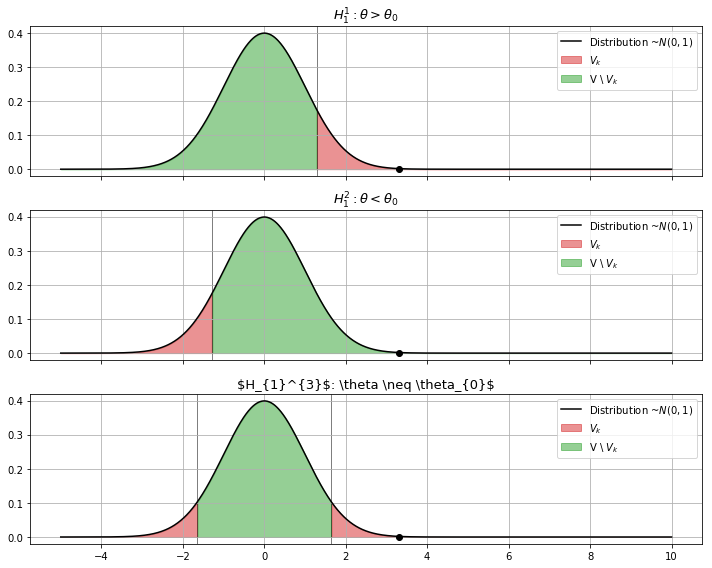

In [253]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
alpha = 0.1

z = (np.mean(x) - mu_h0) * np.sqrt(x.shape[0]) / sigma

# 1 Alternative
u_h0 = st.norm.ppf(1. - alpha)
# 2 Alternative
u_h1 = st.norm.ppf(alpha)

# 3 Alternative
u_lh3 = st.norm.ppf(alpha/2.)
u_rh3 = st.norm.ppf(1. - alpha/2.)

# 1 Alternative
Vk = x_[x_ > u_h0] ; not_Vk = x_[x_ < u_h0]

ax[0].plot(x_, normal_distribution(x_, 0, 1), 'k', label = r'Distribution ~$N(0, 1)$')
ax[0].fill_between(Vk, normal_distribution(Vk, 0, 1), color = 'C3', alpha = 0.5, label = r'$V_{k}$')
ax[0].fill_between(not_Vk, normal_distribution(not_Vk, 0, 1), color = 'C2', alpha = 0.5, label = r"V \ $V_{k}$")
ax[0].axvspan(u_h0, 1.01 * u_h0, alpha=0.5, color='k')
ax[0].plot(z, 0., 'ko')
ax[0].set_title(r'$H_{1}^{1}: \theta > \theta_{0}$', fontsize = 13)

print(r'p-val 1 = {:.5f}'.format(1. - st.norm.cdf(z)))

# 2 Alternative
Vk = x_[x_ < u_h1] ; not_Vk = x_[x_ > u_h1]

ax[1].plot(x_, normal_distribution(x_, 0, 1), 'k', label = r'Distribution ~$N(0, 1)$')
ax[1].fill_between(Vk, normal_distribution(Vk, 0, 1), color = 'C3', alpha = 0.5, label = r'$V_{k}$')
ax[1].fill_between(not_Vk, normal_distribution(not_Vk, 0, 1), color = 'C2', alpha = 0.5, label = r"V \ $V_{k}$")
ax[1].axvspan(u_h1, 1.01 * u_h1, alpha=0.5, color='k')
ax[1].plot(z, 0., 'ko')
ax[1].set_title(r'$H_{1}^{2}: \theta < \theta_{0}$', fontsize = 13)

print(r'p-val 2 = {:.5f}'.format(st.norm.cdf(z)))

# 3 Alternative
mask = np.logical_and(x_ > u_lh3,  x_ < u_rh3)
Vk = x_[mask] ;
not_Vk1 = x_[x_< u_lh3]
not_Vk2 = x_[x_> u_rh3]

ax[2].plot(x_, normal_distribution(x_, 0, 1), 'k', label = r'Distribution ~$N(0, 1)$')
ax[2].fill_between(not_Vk1, normal_distribution(not_Vk1, 0, 1), color = 'C3', alpha = 0.5)
ax[2].fill_between(not_Vk2, normal_distribution(not_Vk2, 0, 1), color = 'C3', alpha = 0.5, label=r'$V_{k}$')
ax[2].fill_between(Vk, normal_distribution(Vk, 0, 1), color = 'C2', alpha = 0.5, label=r"V \ $V_{k}$")
ax[2].axvspan(u_lh3, 1.01 * u_lh3, alpha=0.5, color='k')
ax[2].axvspan(u_rh3, 0.99 * u_rh3, alpha=0.5, color='k')
ax[2].plot(z, 0., 'ko')
ax[2].set_title(r'$H_{1}^{3}$: \theta \neq \theta_{0}$', fontsize = 13)

print(r'p-val 3 = {:.5f}'.format( 2. * np.min([1. - st.norm.cdf(z), st.norm.cdf(z)])))

for i in xrange(3):
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, labels)
    ax[i].grid('on')
plt.tight_layout()

plt.show()

Таким образом, по рисункам выше можно сделать следующие выводы:
1. Альтернатива 1. Мы отвергаем гипотезу о том, что математическое ожидание равно 1. Скорее примем альтернативу что математическое ожидание больше 1. (Верно, так как на выборке 1.3)
2. Альтернатива 2. Мы принимаем гипотезу о том, что математическое ожидание равно 1. Это более похоже правду, нежели то что математическое ожидание меньше 1. (Верно, так как на выборке 1.3)
3. Альтернатива 3. Мы отвергаем гипотезу о том, что математическое ожидание равно 1. Скорее примем альтернативу что математическое ожидание не равно 1. (Верно, так как на выборке 1.3)

### 4.2. Гипотезы о неизвестном среднем при неизвестной дисперсии.

Постановка задачи полностью совпадает с задачей из предыдущего пункта, только теперь неизвестна дисперсия.
Как и ранее, оценим дисперсию через ее несмещенную оценку:

\begin{equation*}
    s^{2} = \frac{1}{n-1}\sum_{i}^{n}\Big(x_{i} - \overline{x}\Big)^{2},
\end{equation*}

Тогда необходимая статистика составляется аналогично статистике из предыдущего пункта, но уже имеет распределение Стьюдента ~$t(n-1)$ (одна степень уходит на выборочное среднее под знаком суммирования в $s^{2}$):

\begin{equation*}
    Z(\cdot) = \frac{\overline X - \theta_{0}}{s \ \sqrt{n}}
\end{equation*}

У данной статистики легко находятся соответствующие критические множества (легко определяются квантили [python: stats.t.ppf(alpha, n-1)] и как следствие можно принять решение о принятии или опровержении гипотезы $H_{0}$.

В зависимости от альтернатив различают все те-же три случая, которые аналогичны рассмотренным ранее.

**Пример задачи**:

Десять разных термометров сопротивления откалибровали по стандартному термометру. При показании стандартного термометра 1000мВ, испытуемые термометры показали:

\begin{equation*}
    986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983
\end{equation*}

Можно ли считать эти отклонения допустимыми или на характеристики термометров повлиял некоторый фактор (при изготовлении или транспортировке)? 
Показания термометров считать распределенными нормально. Уровень значимости принять 0.05

Найдите p-значение и примите статистическое решение.

In [64]:
x = np.array([986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983], dtype=float)
n = float(x.shape[0])
mu = 1000.
alpha = 0.05

x_ = np.mean(x)
# Standart deviation
def std(x):    
    s = 0.
    for i in x:
        s+=(i - x_)**2
    s /= (n-1)
    return np.sqrt(s)

s = std(x)

z = (x_ - mu) * np.sqrt(n) / s

phi_1 = st.t.cdf(z, n-1)
phi_2 = 1. - st.t.cdf(z, n-1)
p_val = 2. * np.min([phi_1, phi_2])

if p_val < alpha:
    print('p = {:.3f}, H1'.format(p_val))
else:
    print('p = {:.3f}, H0'.format(p_val))

p = 0.043, H1


### 4.3. Гипотезы о неизвестной дисперсии.

** Постановка задачи**:

Рассмотрим выборку $X_{n} = [x_{1},..., x_{n}]$ из нормального распределения с неизвестной дисперсией ~$N(\mu, \theta^{2})$.

Построим критические множества и соответствующие p-value для задач с гипотезой $H_{0}$: $\theta = \theta_{0}$ и альтернативами:
- Альтернатива 1 $H_{1}^{1}$: $\theta > \theta_{0}$
- Альтернатива 2 $H_{1}^{2}$: $\theta < \theta_{0}$
- Альтернатива 3 $H_{1}^{3}$: $\theta \neq \theta_{0}$

** Решение задачи**:

Решение задачи проводится аналогично предыдущим пунктом, для этого выбирается следующая статистика:

\begin{equation*}
    Z(\cdot) = \frac{(n-1)s^{2}}{\theta^{2}},
\end{equation*}

имеющая распределение $\chi^{2}(n-1)$.

Стоит отметить что это распределение при неизвестном значении математического ожидания, при известном математическом ожидании под знаком $s^{2}$ вместо выборочного среднего $\overline{x}$ будем вычитать известное математическое ожидание $\mu$ : $\sum_{i}^{n}(x-\mu)^2$, что приведет к восстановлению одной степени свободы и статистика критерия будет иметь распределение $\chi^{2}(n)$.

Уже у данной статистики легко находятся соответствующие критические множества (легко определяются квантили [python: stats.chi2.ppf(alpha, n-1)] и как следствие можно принять решение о принятии или опровержении гипотезы $H_{0}$.

В зависимости от альтернатив различают все те-же три случая, которые аналогичны рассмотренным ранее.

** Пример задачи**:

При отлаженном процессе наполнения тюбиков с зубной пастой в одну упаковку в среднем помещается 100 мл зубной пасты, при этом дисперсия объема зубной пасты в упаковке не должна превышать 9 (мл в квадрате). Отдел контроля качества отобрал 25 упаковок и рассчитал несмещённую оценку дисперсии:

\begin{equation*}
    s^{2} = \frac{1}{n-1}\sum_{i}^{n}\Big(x_{i} - \overline{x}\Big)^{2}
\end{equation*}

Есть ли основания считать, что дисперсия объема зубной пасты превышает допустимый предел? 
Используйте уровень значимости 0.05. 
Предполагается, что объем зубной пасты в упаковке подчиняется нормальному закону распределения.

Найдите p-значение, примите статистическое решение.

### 4.4. Гипотезы о неизвестной вероятности успеха в схеме испытаний Бернулли.

** Постановка задачи**:

Рассмотрим выборку $X_{n} = [x_{1},..., x_{n}]$ из распределения Бернулли B(n, p).

Построим критические множества и соответствующие p-value для задач с гипотезой связанной с вероятностью успеха $p = \frac{m}{n}$, где m - число успехов в серии из n испытаний, т.е. $H_{0}$: $p = p_{0}$ и альтернативы:
- Альтернатива 1 $H_{1}^{1}$: $p > p_{0}$
- Альтернатива 2 $H_{1}^{2}$: $p < p_{0}$
- Альтернатива 3 $H_{1}^{3}$: $p \neq p_{0}$

** Решение задачи**:

Данную задачу решают используя **предельную теорему Муавра-Лапласа** для схемы Бернулли (поэтому все оценки предельные и стремятся к истинным при больших n).
По теореме Муавра-Лапласа, при неограниченном росте числа испытаний n в схеме с распределением Бернулли, распределение Бернулли переходит в нормальное распределение.
Поэтому, статистика вида:

\begin{equation*}
    Z(\cdot) = \frac{p - p_{0}}{\sqrt{p(1-p)}}\sqrt{n},
\end{equation*}

имеет стандартное нормальное распределение ~$N(0, 1)$.

Уже у данной статистики легко находятся соответствующие критические множества (легко определяются квантили [python: stats.norm.ppf(alpha)]) и как следствие можно принять решение о принятии или опровержении гипотезы $H_{0}$.

В зависимости от альтернатив различают все те-же три случая, которые аналогичны рассмотренным ранее.

**P.S** Можно использовать и другие статистики, например, статистика, возвращающая число успехов (вместо вероятности успеха):

\begin{equation*}
    Z(\cdot) = \frac{m - np_{0}}{\sqrt{np(1-p)}},
\end{equation*}

Так как математическое ожидание Биномиального распределения $E \xi = np$, и дисперсия $D\xi=np(1-p)$, то данное распределение тоже имеет стандартное нормальное распределение и может быть использовано для поиска критической области $V_{k}$.

In [63]:
D = 9.
n =25
s2 = 13.5
alpha = 0.05

z = (n-1) * s2 / D
p_val = 1. - st.chi2.cdf(z, n-1)

if (p_val < alpha):
    print('{:.3f}, H1'.format(p_val))
else:
    print('{:.3f}, H0'.format(p_val))


0.055, H0


## 4. Ошибки I и II рода.

Поскольку принятие или опровержение гипотезы носят вероятностный характер (т.к. мы принимаем решение на основе выборки $X_{n}$), то мы можем совершить ошибку.

**Опр.** Ошибкой первого рода $\alpha$ называется вероятность принять альтернативу при верной гипотезе.

\begin{equation*}
    \alpha = P\Big( z \subset V{k} \quad | \quad H_{0}\Big).
\end{equation*}

**Опр.** Ошибкой второго рода $\beta$ называется вероятность принять гипотезу при верной альтернативе.

\begin{equation*}
    \beta = P\Big( z \notin V{k} \quad | \quad H_{1}\Big).
\end{equation*}

**Опр.** Мощностью критерия называется вероятность того что значение статистики попало в критическую область $V_{k}$ при условии что верна альтернатива $H_{1}$:

\begin{equation*}
    \beta = P\Big( z\subset V{k} \quad | \quad H_{1}\Big).
\end{equation*}

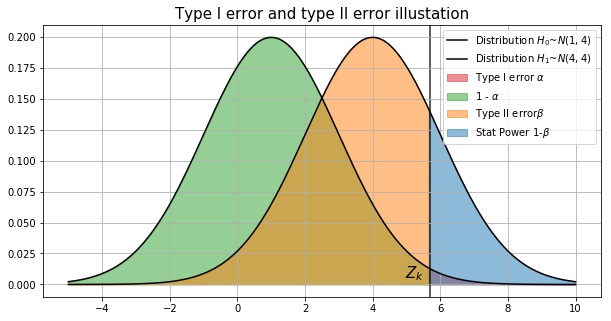

In [202]:
z_crit = sigma * st.norm.ppf(1.-alpha) + mu_h0
Vk = x_[x_ > z_crit]; not_Vk = x_[x_ <= z_crit]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_, normal_distribution(x_, mu_h0, sigma), 'k', label = r'Distribution $H_{0}$~$N(1, 4)$')
ax.fill_between(Vk, normal_distribution(Vk, mu_h0, sigma), color = 'C3', alpha = 0.5, label = r'Type I error $\alpha$')
ax.fill_between(not_Vk, normal_distribution(not_Vk, mu_h0, sigma), color = 'C2', alpha = 0.5, label = r'1 - $\alpha$')

ax.plot(x_, normal_distribution(x_, mu_h1, sigma), 'k', label = r'Distribution $H_{1}$~$N(4, 4)$')
ax.fill_between(not_Vk, normal_distribution(not_Vk, mu_h1, sigma), color = 'C1', alpha = 0.5, label = r'Type II error$\beta$')
ax.fill_between(Vk, normal_distribution(Vk, mu_h1, sigma), color = 'C0', alpha = 0.5, label = r'Stat Power 1-$\beta$')

ax.axvspan(z_crit, 1.01 * z_crit, alpha=0.5, color='k')
ax.text(z_crit - 0.7, 0.005, r'$Z_{k}$', fontsize=15)

ax.grid('on')
ax.set_title('Type I error and type II error illustation', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

## 5. Лемма Неймана-Пирсона.

Обычно поиск наиболее мощного критерия происходит следующим образом:
1. Фиксируем ошибку первого рода $\alpha$.
2. Варьируем $\beta$ так чтобы получить максимальную мощность.

Основным методом построения наиболее мощных критериев является метод отношения правдоподобия.

Лемма Неймана-Пирсона говорит от том как построить наиболее мощный критерий при простых гипотезе $H_{0}$ и альтернативе $H_{1}$, в частности как построить критическое множество $V_{k}$ через нахождение критической функции.

**Лемма**. При фиксированной ошибке первого рода $\alpha$ наиболее мощный критерий имеет критическую функцию вида:
\begin{equation*}
    \phi(x_{i}) = \begin{cases} 1, & L_{1}(x_{i}) > cL_{0}(x_{i})  \\ 0, & L_{1}(x_{i}) < cL_{0}(x_{i}) \end{cases},
\end{equation*}
где $L_{0}(x_{i}) = \prod_{i}^{n} f_{0}(x_{i})$, $L_{1}(x_{i}) = \prod_{i}^{n} f_{1}(x_{i})$ это функции правдоподобия при верной гипотезе $H_{0}$ и альтернативе $H_{1}$ соответственно, с аргументами $x_{i}$ это просто значение на числовой прямой в которой мы хотим определить принадлежность к критическому множеству (не перепутать в элементами выборки) и $f_{0}(x_{i})$ и $f_{1}(x_{i})$ - соответственно плотности распределений гипотезы и альтернативы.

Константа $c$ определяется из уравнения $\alpha = \int_{c}^{+\infty}f_{0}(x)dx$.


Хороший пример применение леммы Неймана-Пирсона при нормальных распределениях с разными математическими ожиданиями описан [тут](https://compscicenter.ru/media/slides/math_stat_2014_spring/2014_02_26_math_stat_2014_spring_1.pdf) или тот-же самый пример на странице 315 учебника Фадеева, Лебедев.

Примеры применения Леммы Немана Пирсона:
- [Гипотеза о математическом ожидании нормального распределения](https://stepik.org/lesson/26216/step/11?unit=8140).
- [Гипотеза о дисперсии нормального распределения](https://stepik.org/lesson/26440/step/8?unit=8326).
- [Гипотеза о вероятности успеха в схеме испытании Бернулли](https://stepik.org/lesson/26440/step/12?unit=8326).